In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from osgeo import ogr,osr,gdal
import os, glob
import cv2
def LoadData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band = src.GetRasterBand(1)
    array= band.ReadAsArray()
    array=array.astype('uint8')
    return cols,rows,array

In [2]:
cols,rows,array=LoadData("PUCUSANA_UNIDO_8May18.tif")

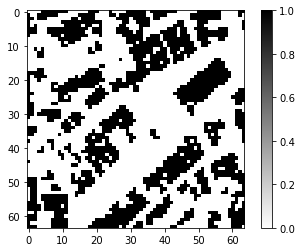

In [3]:
#a=plt.imread("PUCUSANA_UNIDO_8May18.tif")
i=10
j=3
plt.imshow(array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)],cmap="binary")
plt.colorbar()

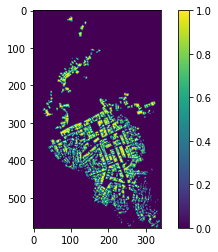

In [4]:
plt.imshow(array)
plt.colorbar()

In [5]:
def OpticalData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band1= src.GetRasterBand(1).ReadAsArray()
    band2= src.GetRasterBand(2).ReadAsArray()
    band3= src.GetRasterBand(3).ReadAsArray()
    array=np.zeros((rows,cols,3))
    array[:,:,0]=band3/np.max(band3)*255
    array[:,:,1]=band2/np.max(band2)*255
    array[:,:,2]=band1/np.max(band1)*255
    array=array.astype('uint8')
    return cols,rows,array

In [6]:
cols2,rows2,array2=OpticalData("20180508_155719_1054_3B_AnalyticMS_SR_clip.tif")

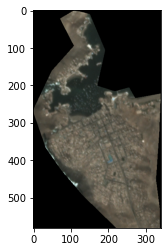

In [7]:
plt.imshow(array2)

In [8]:
print(np.min(array))

0


In [9]:
for i in range(17):
    for j in range(9):
        cv2.imwrite(os.path.join("ImgData","img_"+str(i)+"_"+str(j)+".jpg"), array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),:])
        cv2.imwrite(os.path.join("LabelData","label_"+str(i)+"_"+str(j)+".jpg"), array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)])

D:\Anaconda\envs\PlanT\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
D:\Anaconda\envs\PlanT\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


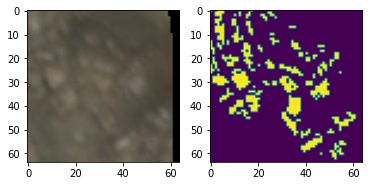

In [10]:
plt.figure(num="k")
for i in range(17):
    for j in range(9):
        np.save(os.path.join("ImgData","img_"+str(i)+"_"+str(j)), array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),:])
        np.save(os.path.join("LabelData","label_"+str(i)+"_"+str(j)), array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)])
        plt.subplot(1,2,1)
        plt.imshow(array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),:])
        plt.subplot(1,2,2)
        plt.imshow(array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)],cmap="binary")
        plt.savefig(str(i)+"_"+str(j)+".png")

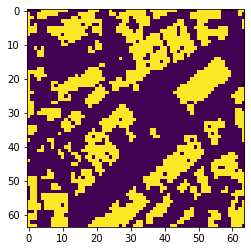

In [11]:
i=10
j=3
a=np.load(os.path.join("LabelData","label_"+str(i)+"_"+str(j)+".npy"))
plt.imshow(a)

FileNotFoundError: [Errno 2] No such file or directory: 'ImgData\\img_10_3.jpg'

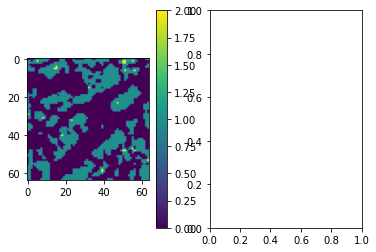

In [12]:
plt.subplot(1,2,1)
a=plt.imread(os.path.join("LabelData","label_10_3.jpg"))
plt.imshow(a)
plt.colorbar()
plt.subplot(1,2,2)
b=plt.imread(os.path.join("ImgData","img_10_3.jpg"))
plt.imshow(b)
#plt.imshow(a,cmap="binary")
#plt.colorbar()
#a.shape

In [ ]:
i=1
array2[5+32*i:,5+32*(i+2):21+32*i:21+32*(i+2),:]

In [ ]:
print(array)

In [ ]:
plt.imshow(array)

In [ ]:
a=plt.imread(os.path.join("LabelData","label_6_6.jpg"))
plt.imshow(a,cmap="binary")
plt.colorbar()

In [ ]:
a=plt.imread(os.path.join("10078675_15.png"))
plt.imshow(a,cmap="binary")
plt.colorbar()

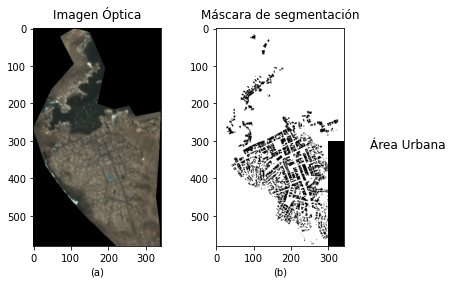

In [35]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from osgeo import ogr,osr,gdal
import os, glob
import cv2
def LoadData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band = src.GetRasterBand(1)
    array= band.ReadAsArray()
    array=array.astype('uint8')
    return cols,rows,array
def OpticalData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band1= src.GetRasterBand(1).ReadAsArray()
    band2= src.GetRasterBand(2).ReadAsArray()
    band3= src.GetRasterBand(3).ReadAsArray()
    array=np.zeros((rows,cols,3))
    array[:,:,0]=band3/np.max(band3)*255
    array[:,:,1]=band2/np.max(band2)*255
    array[:,:,2]=band1/np.max(band1)*255
    array=array.astype('uint8')
    return cols,rows,array

cols,rows,array=LoadData("PUCUSANA_UNIDO_8May18.tif")
cols2,rows2,array2=OpticalData("20180508_155719_1054_3B_AnalyticMS_SR_clip.tif")

plt.figure(num="imp")
plt.subplot(1,2,1)
plt.imshow(array2)
plt.title('Imagen Óptica', pad=10)
plt.xlabel('(a)')
plt.subplot(1,2,2)
plt.imshow(array,cmap="binary")
plt.title('Máscara de segmentación', pad=10)
plt.xlabel('(b)')

plt.gca().add_patch(plt.Rectangle((300, 300), 800, 700, color='black'))
plt.text(410, 310, 'Área Urbana', color='black', fontsize=12, verticalalignment='center')

# Agregar cuadrado blanco y texto "Texto 2"
#plt.gca().add_patch(plt.Rectangle((400, 350), 440, 390, color='white', edgecolor='black'))
#plt.text(410, 360, 'No definido', color='black', fontsize=12, verticalalignment='center')
plt.savefig("Segmentación"+".pdf", dpi=600, bbox_inches='tight')

No handles with labels found to put in legend.


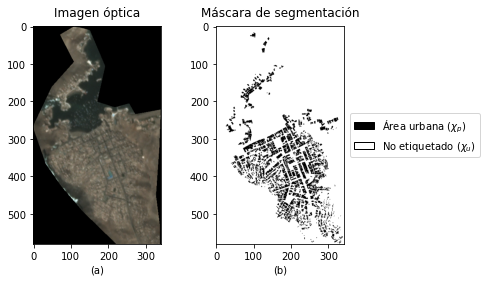

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from osgeo import ogr,osr,gdal
import os, glob
import cv2
from matplotlib.patches import Rectangle
def LoadData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band = src.GetRasterBand(1)
    array= band.ReadAsArray()
    array=array.astype('uint8')
    return cols,rows,array
def OpticalData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band1= src.GetRasterBand(1).ReadAsArray()
    band2= src.GetRasterBand(2).ReadAsArray()
    band3= src.GetRasterBand(3).ReadAsArray()
    array=np.zeros((rows,cols,3))
    array[:,:,0]=band3/np.max(band3)*255
    array[:,:,1]=band2/np.max(band2)*255
    array[:,:,2]=band1/np.max(band1)*255
    array=array.astype('uint8')
    return cols,rows,array

cols,rows,array=LoadData("PUCUSANA_UNIDO_8May18.tif")
cols2,rows2,array2=OpticalData("20180508_155719_1054_3B_AnalyticMS_SR_clip.tif")

fig, axs = plt.subplots(1, 2)

axs[0].imshow(array2, cmap="binary")
axs[0].set_title('Imagen óptica', pad=10)
axs[0].set_xlabel('(a)')
#axs[0].axis('off')
axs[1].imshow(array, cmap="binary")
axs[1].set_title('Máscara de segmentación', pad=10)
axs[1].set_xlabel('(b)')
axs[1].legend()
#axs[1].axis('off')
handles = [Rectangle((0, 0), 1, 1, fc="black", ec="black",label="Área urbana ($\chi_p$)"),
           Rectangle((0, 0), 1, 1, fc="white", ec="black",label="No etiquetado ($\chi_u$)")]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.savefig("Segmentación"+".pdf", dpi=600, bbox_inches='tight')

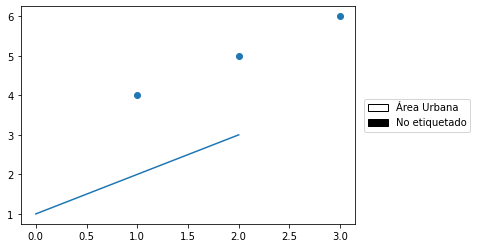

In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Trazar algo para tener una leyenda
plt.plot([1, 2, 3], label='Leyenda 1')
plt.scatter([1, 2, 3], [4, 5, 6], label='Leyenda 2')

# Definir el contenido y la ubicación de la primera leyenda

handles = [Rectangle((0, 0), 1, 1, fc="black", ec="black",label="Área Urbana"),
           Rectangle((0, 0), 1, 1, fc="white", ec="black",label="No etiquetado")]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.01, 0.5))

# Definir el contenido y la ubicación de la segunda leyenda
#handles = [plt.Line2D([0], [0], color='blue', lw=4, label='Otra Linea'),
           #plt.Circle((0,0),0.2,color='blue', label='Círculo')]
#plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.02, 0.5))

# Mostrar el gráfico
plt.show()

(-0.5, 63.5, 63.5, -0.5)

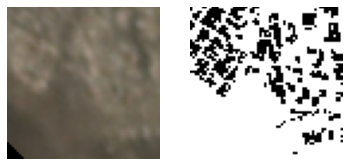

In [95]:
i=15
j=5
plt.subplot(1,2,1)
plt.imshow(array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),:])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)],cmap="binary")
plt.axis('off')

In [104]:
len(array2)

581

In [105]:
path="20180508_155719_1054_3B_AnalyticMS_SR_clip.tif"
raster = os.path.join(path)
src = gdal.Open(raster)
cols = src.RasterXSize
rows = src.RasterYSize
band1= src.GetRasterBand(1).ReadAsArray()
band2= src.GetRasterBand(2).ReadAsArray()
band3= src.GetRasterBand(3).ReadAsArray()
band4= src.GetRasterBand(4).ReadAsArray()

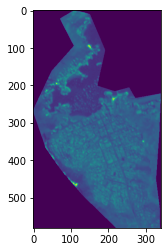

In [115]:
plt.imshow(array2[:,:,2])

(-0.5, 63.5, 63.5, -0.5)

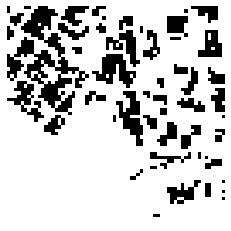

In [145]:
i=15
j=5
plt.plot(1,2,1)
plt.imshow(array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)],cmap="binary")
plt.axis('off')
#plt.subplot(1,2,2)
#plt.imshow(array[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2)],cmap="binary")
#plt.axis('off')

Text(0.5, 0, 'Infrarojo')

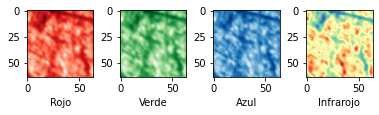

In [139]:
from matplotlib.colors import ListedColormap
i=14
j=5

fig, axs = plt.subplots(1, 4)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

axs[0].imshow(255*array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),0],cmap="Reds")
axs[0].set_xlabel('Rojo')
#axs[0].axis('off')
axs[1].imshow(255*array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),1],cmap="Greens")
axs[1].set_xlabel('Verde')
#axs[1].axis('off')
axs[2].imshow(255*array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),2],cmap="Blues")
axs[2].set_xlabel('Azul')
#axs[2].axis('off')
axs[3].imshow(255*array2[5+32*i:5+32*(i+2),21+32*j:21+32*(j+2),0],cmap="Spectral")
axs[3].set_xlabel('Infrarojo')
#axs[3].axis('off')

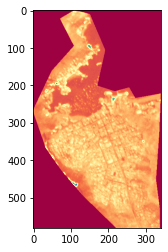

In [ ]:
#Greens, blues,"Spectral"